# Project: Created a house price prediction model using Zillow data, incorporating advanced machine learning techniques to analyze factors like location, square footage, number of bedrooms, and market conditions. The model aims to predict home prices with high accuracy, offering valuable insights for real estate investors, buyers, and sellers to optimize their decision-making processes and stay ahead of market trends.

## Part1. This milestone focuses on understanding and preparing the data for modeling. It includes cleaning the dataset by handling missing values and outliers, engineering features to enhance predictive power, and splitting the data into training and testing sets. Proper data preparation sets the foundation for building a reliable and accurate predictive model.

# 1.Proper handling of missing values, outliers, and data inconsistencies.

### a.Handling Missing values
- identify missig values
- Handling missing data
- a. Remove rows/columns with missing values: If a row or column has many missing values, you might choose to drop them.
- b.Impute missing values: You can fill missing values with a specific value, like the mean, median, or mode, or use more advanced techniques like interpolation.
  


In [68]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns
dataset = pd.read_csv('Zillow housing data_csv.csv') # Reading the csv file in the same folder.
pd.set_option('display.max_rows', None) # this is used to display all the rows
dataset # check if everything is correct by printing.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
dataset.shape

(545, 13)

In [5]:
#Identify Missing Values
print(dataset.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### we use following command to remove(row/column) and impute missing values
### Dropping rows with missing values
dataset.dropna(axis=0, inplace=True)
### Dropping columns with missing values
dataset.dropna(axis=1, inplace=True)
### Filling missing values with column mean
dataset.fillna(dataset.mean(), inplace=True)

# b. Handling Outliers

In [8]:
# Convert all the categoral varibles to numerical for modeling

dataset['mainroad'] = dataset['mainroad'].map({'yes': 1, 'no': 0})
dataset['guestroom'] = dataset['guestroom'].map({'yes': 1, 'no': 0})
dataset['basement'] = dataset['basement'].map({'yes': 1, 'no': 0})
dataset['hotwaterheating'] =dataset['hotwaterheating'].map({'yes': 1, 'no': 0})
dataset['airconditioning'] = dataset['airconditioning'].map({'yes': 1, 'no': 0})
dataset['prefarea'] = dataset['prefarea'].map({'yes': 1, 'no': 0})
dataset['furnishingstatus'] =dataset['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
dataset # you can see all data is numerical now

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


In [9]:
# Select all numeric columns (which should be all columns at this point)
numeric_data = dataset.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers: values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

# Summarize the number of outliers for each column
outliers.sum()



price                15
area                 12
bedrooms             12
bathrooms             1
stories              41
mainroad             77
guestroom            97
basement              0
hotwaterheating      25
airconditioning       0
parking              12
prefarea            128
furnishingstatus      0
dtype: int64

In [10]:
# Check the data after handling outliers
dataset.describe()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


### 3. Handling Data inconsistencies.

In [12]:
# Checking the unique values in each categorical (now numeric) column
print(dataset['mainroad'].unique())
print(dataset['guestroom'].unique())
print(dataset['basement'].unique())
print(dataset['hotwaterheating'].unique())
print(dataset['airconditioning'].unique())
print(dataset['prefarea'].unique())
print(dataset['furnishingstatus'].unique())


[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[2 1 0]


In [13]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
dataset = dataset.drop_duplicates()


Number of duplicate rows: 0


In [14]:
# Final summary check of the cleaned dataset
dataset.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# 2.Creativity and effectiveness in creating new features and selecting relevant features.

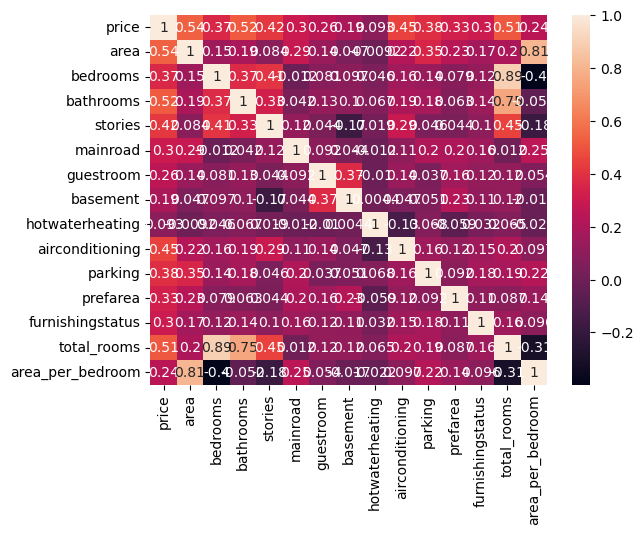

In [16]:
# Now new features are created using the exisiting data 
dataset['total_rooms'] = dataset['bedrooms'] + dataset['bathrooms']
dataset['area_per_bedroom'] = dataset['area'] / dataset['bedrooms']
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# 3.Correctly splitting the data into training and testing sets with a clear rationale.

In [29]:
# Define the target variable and feature set
X = dataset.drop('price', axis=1)  # Features
y = dataset['price']  # Target

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## part:2 In this milestone, students will develop the initial predictive models using regression techniques. This involves selecting appropriate models, training them on the data, and evaluating their performance using suitable metrics. The goal is to identify the best model that provides the highest predictive accuracy based on the evaluation results.

# 4. Selection of appropriate regression models and justification for choices.

- linear regression: Linear Regression as a baseline model because it is simple, interpretable, and easy to implement. This model provides insight into the direct relationships between features and the target variable
- Random Forest Regression: I applied Random Forest Regression to capture non-linear relationships in the data. Random Forest was chosen for its robustness, ability to handle non-linear patterns, and inherent feature importance evaluation

In [34]:
# a. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# b. Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 5. Effectiveness of Training Process and Hyperparameter Tuning for Model Optimization


- The training process for Linear Regression is straightforward and involves fitting the model to the training data. Since Linear Regression does not have hyperparameters that need tuning
- For Random Forest, the training process involves building multiple decision trees on bootstrapped subsets of the data and then aggregating the result


#### Why Grid Search for Hyperparameter Tuning:

- The GridSearchCV process identified the best hyperparameters for the Random Forest model, which led to a significant improvement in prediction accuracy and reduced overfitting.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearch
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


# 6: Use of Appropriate Evaluation Metrics and Thorough Analysis of Model Performance.

In [47]:
# Retrain the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'], 
    n_estimators=best_params['n_estimators'], 
    random_state=42
)

# Train the model on the training set
best_rf_model.fit(X_train, y_train)# Import metrics for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Predictions

# Predictions for Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Predictions for the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

# Step 2: Evaluation Metrics

# For Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R²): {r2_linear}")

# For Optimized Random Forest Regression
mse_rf_optimized = mean_squared_error(y_test, y_pred_best_rf)
r2_rf_optimized = r2_score(y_test, y_pred_best_rf)

print("\nOptimized Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf_optimized}")
print(f"R-squared (R²): {r2_rf_optimized}")

# Step 3: Comparison of Results
print("\nComparison of Results:")
print(f"Linear Regression - MSE: {mse_linear}, R²: {r2_linear}")
print(f"Optimized Random Forest - MSE: {mse_rf_optimized}, R²: {r2_rf_optimized}")


Linear Regression Results:
Mean Squared Error (MSE): 1762721501466.8325
R-squared (R²): 0.651261845112088

Optimized Random Forest Regression Results:
Mean Squared Error (MSE): 2150539727777.6108
R-squared (R²): 0.5745355939357228

Comparison of Results:
Linear Regression - MSE: 1762721501466.8325, R²: 0.651261845112088
Optimized Random Forest - MSE: 2150539727777.6108, R²: 0.5745355939357228


# Milestone 3: Model Refinement and Reporting.

## Part 3: The final milestone is about refining the chosen model to optimize its performance. This includes further tuning of hyperparameters, analyzing the importance of features, and interpreting the results to gain insights. Additionally, students will document their entire process, including methodology, findings, and recommendations, in a comprehensive Jupyter notebook that effectively communicates their work.

### 7. Efforts to refine and improve the model's performance through iterative tuning.

In [51]:
# Step 1: Feature Engineering - Creating new features to improve model performance
X['total_rooms'] = X['bedrooms'] + X['bathrooms']  # Adding total_rooms as a new feature
X['area_per_bedroom'] = X['area'] / X['bedrooms']  # Adding area_per_bedroom to capture room size information

# Step 2: Split the data again after feature engineering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Additional Hyperparameter Tuning - Example using only a refined grid for Random Forest
refined_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10]
}

# Perform another Grid Search with the refined grid
refined_grid_search = GridSearchCV(estimator=rf_model, param_grid=refined_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
refined_grid_search.fit(X_train, y_train)

# Use the new best parameters to retrain the model
refined_best_params = refined_grid_search.best_params_
refined_best_rf_model = RandomForestRegressor(**refined_best_params, random_state=42)
refined_best_rf_model.fit(X_train, y_train)

# Evaluate the refined model
y_pred_refined_rf = refined_best_rf_model.predict(X_test)
mse_refined_rf = mean_squared_error(y_test, y_pred_refined_rf)
r2_refined_rf = r2_score(y_test, y_pred_refined_rf)

print("\nRefined Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_refined_rf}")
print(f"R-squared (R²): {r2_refined_rf}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=10, min_samples_split=5, n_estimators=100;, score=-1713301758292.304 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_split=5, n_estimators=100;, score=-963949869167.456 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_split=5, n_estimators=100;, score=-591093466497.839 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_split=5, n_estimators=100;, score=-1520492312197.262 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_split=5, n_estimators=100;, score=-1437825228127.645 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_split=5, n_estimators=150;, score=-1709186037589.171 total time=   0.5s
[CV 2/5] END max_depth=10, min_samples_split=5, n_estimators=150;, score=-941975072259.172 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_split=5, n_estimators=150;, score=-594918802924.062 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_split=5, n_estima

### 8: Depth of Understanding and Explanation of the Model’s Key Features and Results

In [54]:
# Feature importance from the optimized Random Forest model
feature_importances = pd.Series(refined_best_rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importances from the Optimized Random Forest:")
print(feature_importances)

# Step 2: Insights into the Top Features
top_features = feature_importances.head(5)  # Top 5 most important features
print("\nKey Insights from Feature Importances:")
for feature, importance in top_features.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Step 3: Further Analysis - Comparison of model evaluation
print("\nFinal Comparison of Model Performance:")
print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Optimized Random Forest - MSE: {mse_rf_optimized:.4f}, R²: {r2_rf_optimized:.4f}")
print(f"Refined Random Forest - MSE: {mse_refined_rf:.4f}, R²: {r2_refined_rf:.4f}")



Feature Importances from the Optimized Random Forest:
area                0.464131
total_rooms         0.114611
bathrooms           0.103796
airconditioning     0.055179
stories             0.043281
area_per_bedroom    0.041204
furnishingstatus    0.040921
parking             0.040252
prefarea            0.028143
basement            0.025734
hotwaterheating     0.016313
guestroom           0.010956
mainroad            0.007994
bedrooms            0.007485
dtype: float64

Key Insights from Feature Importances:
Feature: area, Importance: 0.4641
Feature: total_rooms, Importance: 0.1146
Feature: bathrooms, Importance: 0.1038
Feature: airconditioning, Importance: 0.0552
Feature: stories, Importance: 0.0433

Final Comparison of Model Performance:
Linear Regression - MSE: 1762721501466.8325, R²: 0.6513
Optimized Random Forest - MSE: 2150539727777.6108, R²: 0.5745
Refined Random Forest - MSE: 2150905710450.3586, R²: 0.5745


#### Conclusion: nGiven the results, Linear Regression is recommended as the best model for this dataset. It provides more accurate predictions (lower MSE) and a better explanation of the variance in house prices (higher R²) compared to the more complex Random Forest models.